In [18]:
import pandas as pd
import numpy as np 

from typing import List
from default_vars import UNCERTAINTY_EXPRESSIONS as EXPR_ORDER
from metrics import get_statistics_per_distribution
from utils_histograms import histogram_to_dataframe
from utils_plot import *
from utils_io import read_json

save_fig_kwargs = {
    "base_dir": "../../figures",
    "dpi": 400,
}


### Human+NV histogram (Figure 3)

Saving figure at ../../figures/human_nv_histograms__stacked.pdf


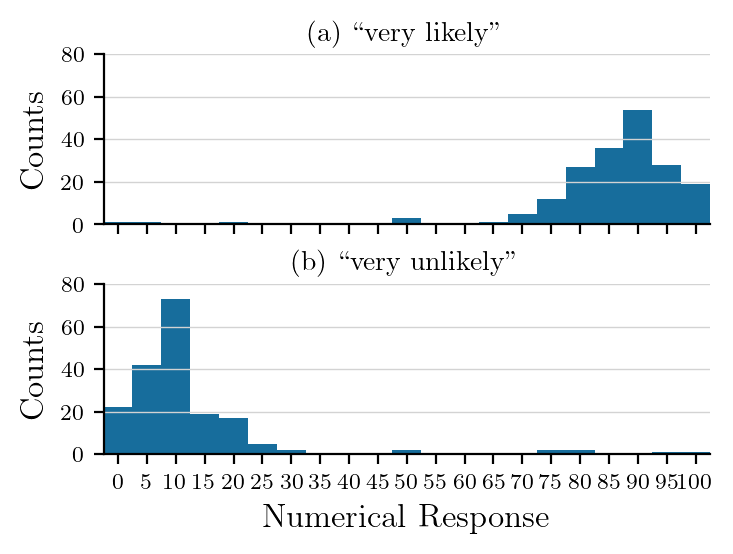

In [19]:
from matplotlib.ticker import MaxNLocator

# Put at top of plotting script (requires tex be installed though)
matplotlib.rc('font', family='serif', size=12)
matplotlib.rc('text', usetex=True)

humans_dist = read_json("../../results/greedy/all/non_verifiable/humans-2shot-filtered/unnormalized.json")
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(COL_WIDTH, 2), dpi=200)
for i, unc in enumerate(["very likely", "very unlikely"]):
    ax = axes[i]
    expr = humans_dist[unc]
    expr.pop("-1")

    numerical_responses, counts = zip(*expr.items())
    numerical_responses = [int(float(r)) for r in numerical_responses]
    sns.barplot(x=numerical_responses, y=counts, ax=ax, width=1)
    ax.spines[['right', 'top']].set_visible(False)
    
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(20))

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor')
    ax.grid(axis='y', which="major", linewidth=0.5, linestyle='-', color="lightgray")
    
    ax.set_ylabel("Counts")
    ax.set_xlabel("Numerical Response")
    ax.set_ylim(0, 80)
    ax.set_title(("(a) " if unc == "very likely" else "(b) ") + f"``{unc}''", fontsize=10, y=1, pad=5)

adjust(fig, hspace=0.35)
save_fig(fig, f"human_nv_histograms__stacked.pdf", **save_fig_kwargs)

## Human+NV - Empirical distribution for all uncertainty expressions (Figure 4)

In [30]:
data = read_json("../../results/greedy/all/non_verifiable/humans-2shot-filtered/normalized.json")
statistic="max"
unc_col="uncertainty_expression"
expr_order=EXPR_ORDER

data_statistics = get_statistics_per_distribution(data)
statistic = data_statistics[statistic]
histogram, statistic_mask = histogram_to_dataframe(data, statistic=statistic, unc_col=unc_col, expr_order=expr_order)

/tmp/ipykernel_2642304/3883659973.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([""] + histogram.index.tolist() + [""])


Saving figure at ../../figures/all__nv_humans_filtered__normalized.pdf


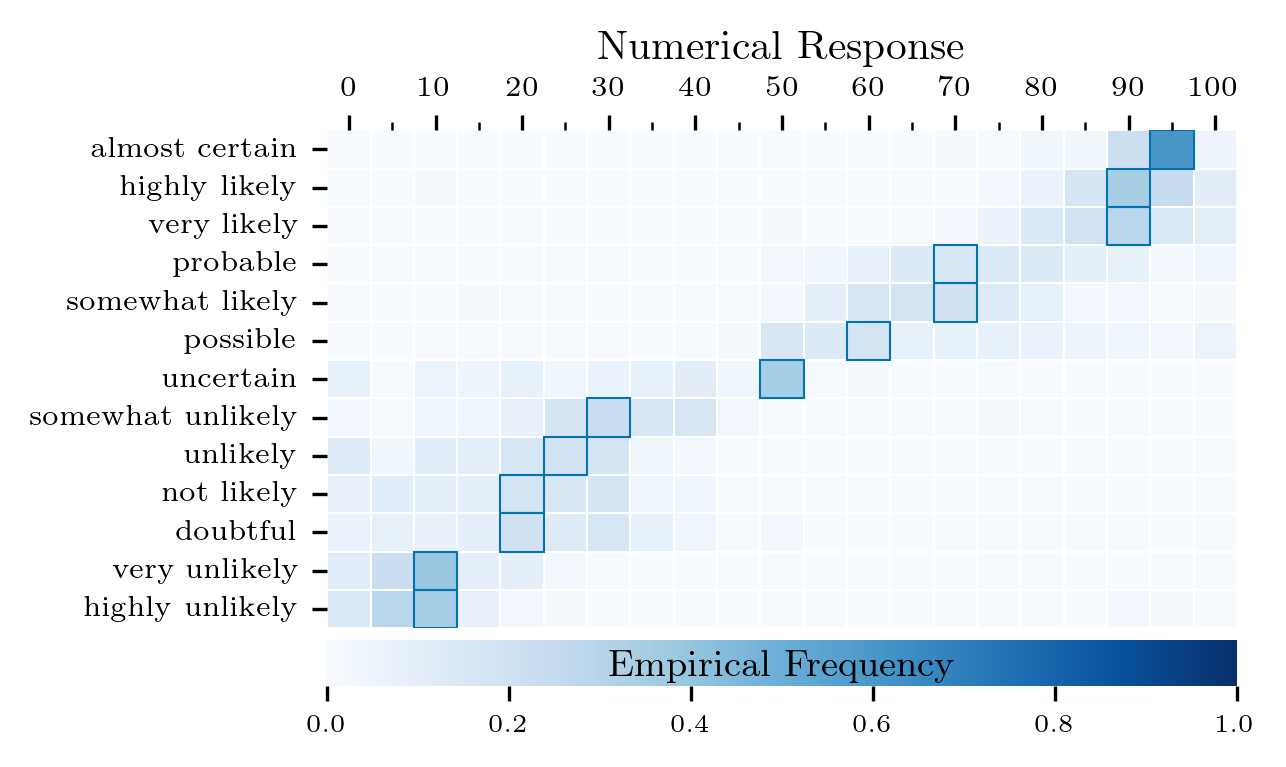

In [140]:
matplotlib.rc('font', family='serif', size=6)

fig, ax = plt.subplots(1, 1, figsize=(COL_WIDTH, 2), dpi=300)

heatmap_kwargs = dict(
    vmin=0, vmax=1, cmap="Blues", linecolor='white', linewidth=0.01,
    cbar_kws={
             'label': 'Empirical Frequency', # Set the colorbar label
             'orientation': 'horizontal', 
             'shrink': 1,                # Shrink the size of the colorbar
             'aspect': 20,                  # Aspect ratio of the colorbar
             'pad': 0.02,  
        },
)
heatmap = sns.heatmap(histogram, ax=ax, **heatmap_kwargs)

# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# Adjust color bar
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
cbar = heatmap.collections[0].colorbar
# Adjust the label position and font size
cbar.set_label('Empirical Frequency', labelpad=-21, fontsize=9)  # labelpad adjusts location
cbar.ax.tick_params(labelsize=6)#, labelcolor=sns.color_palette()[0])  # Customize font size, color, and rotation

# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# Add blue boxes surrounding the mode of the distribution
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
highlight_coords = np.argwhere(statistic_mask == 1)    
for coord in highlight_coords:
    y, x = coord
    rect = plt.Rectangle([x, y], 1, 1, fill=False, edgecolor=sns.color_palette()[0], linewidth=0.5)
    ax.add_patch(rect)

# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# Additional formatting
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
ax.set_xlabel("Numerical Response", fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_minor_locator(MultipleLocator(1, offset=0.5))
ax.xaxis.set_major_locator(MultipleLocator(2, offset=0.5))

ax.set_ylabel(None)
ax.yaxis.set_major_locator(MultipleLocator(1, offset=0.5))
ax.set_yticklabels([""] + histogram.index.tolist() + [""])

ax.tick_params(which="minor", bottom=False, left=True, top=True)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize=7)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=7)
# 

adjust(fig)
save_fig(fig, f"all__nv_humans_filtered__normalized.pdf", **save_fig_kwargs)